In [ ]:
### live plot 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = 10, 5

In [23]:
plt.style.use("ggplot")

In [22]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [16]:
data = pd.read_csv("Glassdoor_Job_Postings.csv")

In [4]:
data.head()

,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
0,ABB,Junior Data Analyst,4.0,Junior Data Analyst\nTake your next career ste...,Bengaluru,"₹3,25,236",/yr (est.),10000+ Employees,1883,Company - Public,Electronics Manufacturing,Manufacturing,$10+ billion (USD),3.7,3.6,4.0,3.5,3.9
1,Philips,Data Scientist - AI/ML,4.0,Job Title\nData Scientist - AI/ML\nJob Descrip...,Bengaluru,NaN,NaN,10000+ Employees,1891,Company - Public,Healthcare Services & Hospitals,Healthcare,$10+ billion (USD),3.8,3.7,4.0,3.5,4.0
2,HSBC,Data Science GSC’s,3.9,Job description\nGraduate/ Post-graduate degre...,Bengaluru,NaN,NaN,10000+ Employees,1865,Company - Public,Banking & Lending,Finance,$10+ billion (USD),3.6,3.6,3.8,3.4,3.7
3,Facctum Solutions,Data Analyst,NaN,Job Description\nExperience: 0 - 2 years in da...,Karnataka,NaN,NaN,1 to 50 Employees,--,Company - Private,--,--,Unknown / Non-Applicable,NaN,NaN,NaN,NaN,NaN
4,JPMorgan Chase & Co,Data and Analytics - Associate,4.0,JOB DESCRIPTION\n\nYou are a strategic thinker...,India,NaN,NaN,10000+ Employees,1799,Company - Public,Banking & Lending,Finance,$10+ billion (USD),4.0,3.9,3.9,3.6,3.7


In [5]:
data.shape

(900, 18)

    1. Home page 
        Insights (analysis, visualizations)
    2. Footer page 
    3. Header page 
    4. Filters 
        location
        job title 
        company rating
        sector 
    5. Mail functionality 
        Authentication 
        
        
        
        Data 
            Preprocessing
                1. Cleaning
                2. Missing Values
                
            WordCloud
            Gifs
            Map

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company                      899 non-null    object 
 1   job_title                    900 non-null    object 
 2   company_rating               656 non-null    float64
 3   job_description              888 non-null    object 
 4   location                     900 non-null    object 
 5   salary_avg_estimate          636 non-null    object 
 6   salary_estimate_payperiod    636 non-null    object 
 7   company_size                 774 non-null    object 
 8   company_founded              774 non-null    object 
 9   employment_type              774 non-null    object 
 10  industry                     774 non-null    object 
 11  sector                       774 non-null    object 
 12  revenue                      774 non-null    object 
 13  career_opportunities

In [7]:
data.describe()

,company_rating,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
count,656.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,3.948171,3.838304,3.678796,3.903010,3.677702,3.804378
std,0.440294,0.520020,0.525854,0.545233,0.589133,0.559777
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.700000,3.600000,3.400000,3.600000,3.300000,3.600000
50%,4.000000,3.800000,3.700000,3.900000,3.600000,3.800000
75%,4.200000,4.100000,4.000000,4.200000,4.000000,4.100000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<h2 style='color:red'> Preprocessing </h2>

1. Clean data <br>
        a. By removing none values <br>
        b. By removing irrelavant columns
2. Removing outliers

In [8]:
data.isna().sum()

company                          1
job_title                        0
company_rating                 244
job_description                 12
location                         0
salary_avg_estimate            264
salary_estimate_payperiod      264
company_size                   126
company_founded                126
employment_type                126
industry                       126
sector                         126
revenue                        126
career_opportunities_rating    169
comp_and_benefits_rating       169
culture_and_values_rating      169
senior_management_rating       169
work_life_balance_rating       169
dtype: int64

    There are many columns with none values but we will remove rows and columns with all none values 

In [17]:
data.dropna(how='all', axis=0, inplace=True)
data.dropna(how='all', axis=1, inplace=True)

In [18]:
data.shape

(900, 18)

    There are no rows or columns with all none values so we have total rows same as previous i.e 900

    All columns are relevant so we will remove no columns

In [19]:
data.head()

,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
0,ABB,Junior Data Analyst,4.0,Junior Data Analyst\nTake your next career ste...,Bengaluru,"₹3,25,236",/yr (est.),10000+ Employees,1883,Company - Public,Electronics Manufacturing,Manufacturing,$10+ billion (USD),3.7,3.6,4.0,3.5,3.9
1,Philips,Data Scientist - AI/ML,4.0,Job Title\nData Scientist - AI/ML\nJob Descrip...,Bengaluru,NaN,NaN,10000+ Employees,1891,Company - Public,Healthcare Services & Hospitals,Healthcare,$10+ billion (USD),3.8,3.7,4.0,3.5,4.0
2,HSBC,Data Science GSC’s,3.9,Job description\nGraduate/ Post-graduate degre...,Bengaluru,NaN,NaN,10000+ Employees,1865,Company - Public,Banking & Lending,Finance,$10+ billion (USD),3.6,3.6,3.8,3.4,3.7
3,Facctum Solutions,Data Analyst,NaN,Job Description\nExperience: 0 - 2 years in da...,Karnataka,NaN,NaN,1 to 50 Employees,--,Company - Private,--,--,Unknown / Non-Applicable,NaN,NaN,NaN,NaN,NaN
4,JPMorgan Chase & Co,Data and Analytics - Associate,4.0,JOB DESCRIPTION\n\nYou are a strategic thinker...,India,NaN,NaN,10000+ Employees,1799,Company - Public,Banking & Lending,Finance,$10+ billion (USD),4.0,3.9,3.9,3.6,3.7


<h2 style='color:red'> Data Analysis and Visualization </h2>

#### Top job profiles

In [25]:
data['job_title'].value_counts()

Data Analyst                         121
Data Scientist                        93
Data Engineer                         59
Data Entry Operator                   19
Data Science Intern                    8
                                    ... 
Sustainability Data Analyst            1
Data Analyst, AVP                      1
Junior Data Engineer (Delhi- NCR)      1
Data Engineer - I                      1
Member Data Science                    1
Name: job_title, Length: 505, dtype: int64

In [38]:
def jobtitle_cleaning(x):
    chars = [':', ';', '(']
    for i in chars:
        if i in x:
            for j in x.split(i):
                if "data" in j.lower():
                    return j.title().strip()
    return x.title().strip()

In [51]:
data['job_title'].apply(jobtitle_cleaning).value_counts()

Data Analyst                   135
Data Scientist                 111
Data Engineer                   67
Data Entry Operator             20
Data Science Intern              9
                              ... 
Data Annotation Analyst          1
Research Analyst                 1
Sustainability Data Analyst      1
Data Annotator - Contractor      1
Member Data Science              1
Name: job_title, Length: 460, dtype: int64

<AxesSubplot:>

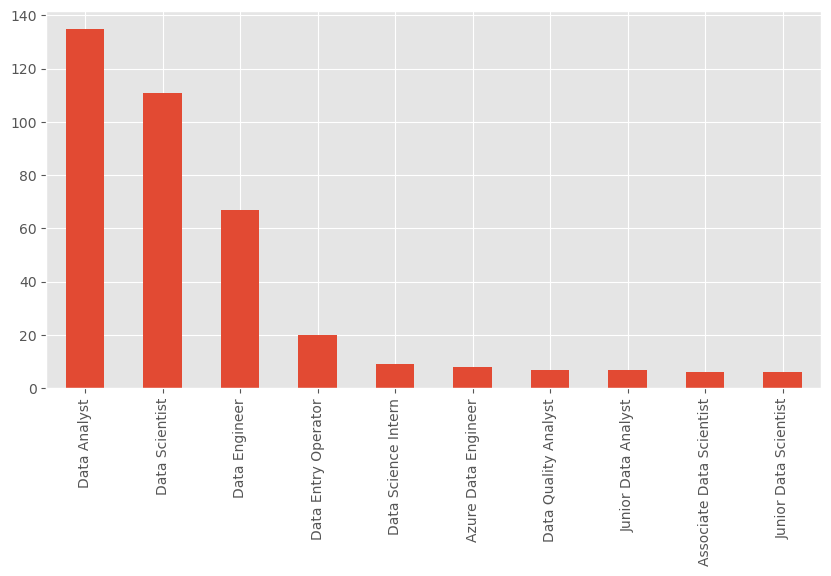

In [44]:
data['job_title'].apply(jobtitle_cleaning).value_counts()[:10].plot(kind='bar')

In [46]:
data['job_title'] = data['job_title'].apply(jobtitle_cleaning)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job_title', ylabel='count'>

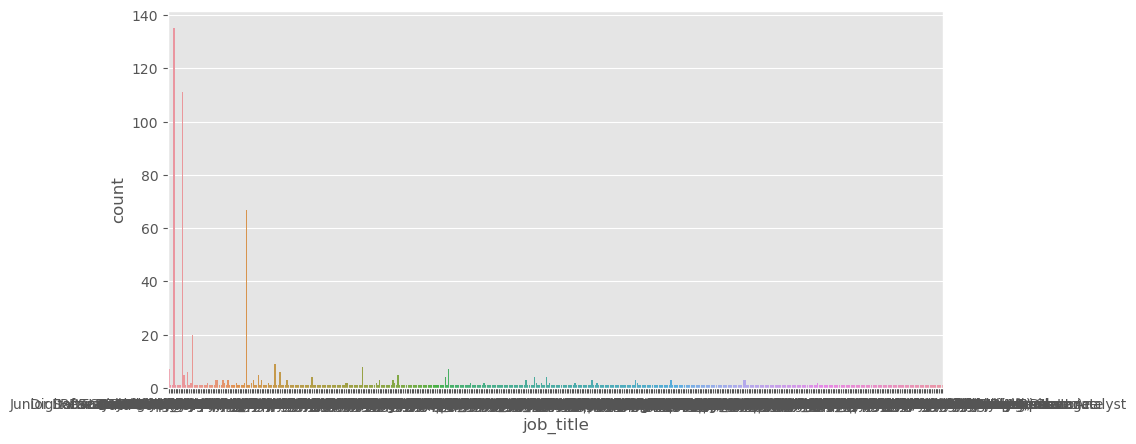

In [47]:
sns.countplot(data['job_title'])

In [53]:
val_count = data['job_title'].value_counts()
val_count[val_count<=1][:30]

Data Officer                                               1
Data Analyst-Digital Analytics                             1
Math- Data Analyst Iii                                     1
Fhir Data Analyst                                          1
Data Scientist-Cx Analytics                                1
Data Analyst 2                                             1
Product Owner Data Acquisition Securities - Associate      1
Data Analyst & Developer                                   1
Senior Associate - Data Science                            1
Operational Data Analyst                                   1
Data Visualization Developer                               1
Data Steward                                               1
Data Entry Clerk                                           1
Data Management - Associate                                1
Digital Marketing Data Analyst                             1
Data Analyst - Sas                                         1
Manager - Data Center Op

    There are many other profiles considering data analyst or data scientist etc but they are with 
    other skills as well. 
    
    Removing those extra keywords and showcasting final result. 

In [57]:
def cleaning_job_title_with_other_skills(x):
    if "-" in x:
        for i in x.split("-"):
            if "data" in x.lower():
                x = i.strip()
                last_val = x.split()[-1]
                if not last_val.strip().isalpha() or "i" in last_val.lower():
                    x = ' '.join(x.split()[:-1])
                    return x
    return x

In [59]:
data['job_title'].apply(cleaning_job_title_with_other_skills).value_counts()

Data Analyst                   136
Data Scientist                 111
Data Engineer                   67
Data                            25
Data Entry Operator             20
                              ... 
Data Warehouse Etl Tester        1
Associate Data Engineer R&D      1
Data Ops                         1
Data Specialist                  1
Member Data Science              1
Name: job_title, Length: 400, dtype: int64

In [61]:
val_count = data['job_title'].apply(cleaning_job_title_with_other_skills).value_counts()
val_count[val_count<=1][:30]

Data Analyst/Power Bi                        1
Digital Marketing Data Analyst               1
Python + Sql                                 1
Data Science & Ai Specialist                 1
Market Research Data Analyst                 1
Data And Analytics Managing Consultant       1
Digital Public                               1
Computer Data Entry Operator                 1
Data Analyst 1                               1
Lighthouse Pyspark Data Engineer             1
Jr Data Science Engineer                     1
Clinical Data Coder                          1
Data Steward                                 1
Data Visualization Associate Senior          1
Data Entry Officer                           1
Data Privacy/Data Analyst                    1
Know Your Customer                           1
Ms Sql- Dba                                  1
Technical Program Manager, Data Analytics    1
Data Officer                                 1
Finance Process & Ops                        1
Senior Analys

In [ ]:
### data analysis 